In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from sklearn import linear_model, svm,model_selection
from tme4_etu import Perceptron
import sklearn
from arftools import *
import numpy as np
import matplotlib.pyplot as plt
from tme4_etu import load_usps

trainx,trainy = load_usps("USPS/USPS_train.txt")
testx,testy = load_usps("USPS/USPS_test.txt")

In [14]:
from MultiClassClassifier import MultiClassClassifier
from cross_validation import validation_croisee

In [17]:
scores = []
numbers = [0]
for number in range(1,10):
    numbers.append(number)
    
    ind = np.where(np.isin(trainy,numbers))
    Y = trainy[ind]
    X = trainx[ind]
    
    clf = MultiClassClassifier(lambda: sklearn.svm.SVC(probability=False))
    score = validation_croisee(X,Y,clf,5)
    print(score)
    scores.append(score)

1.0
0.996587030717
0.92753542111
0.692216981132
0.532742440042
0.571978021978
0.550204750205
0.452984605984
0.476201543609


<IPython.core.display.Javascript object>


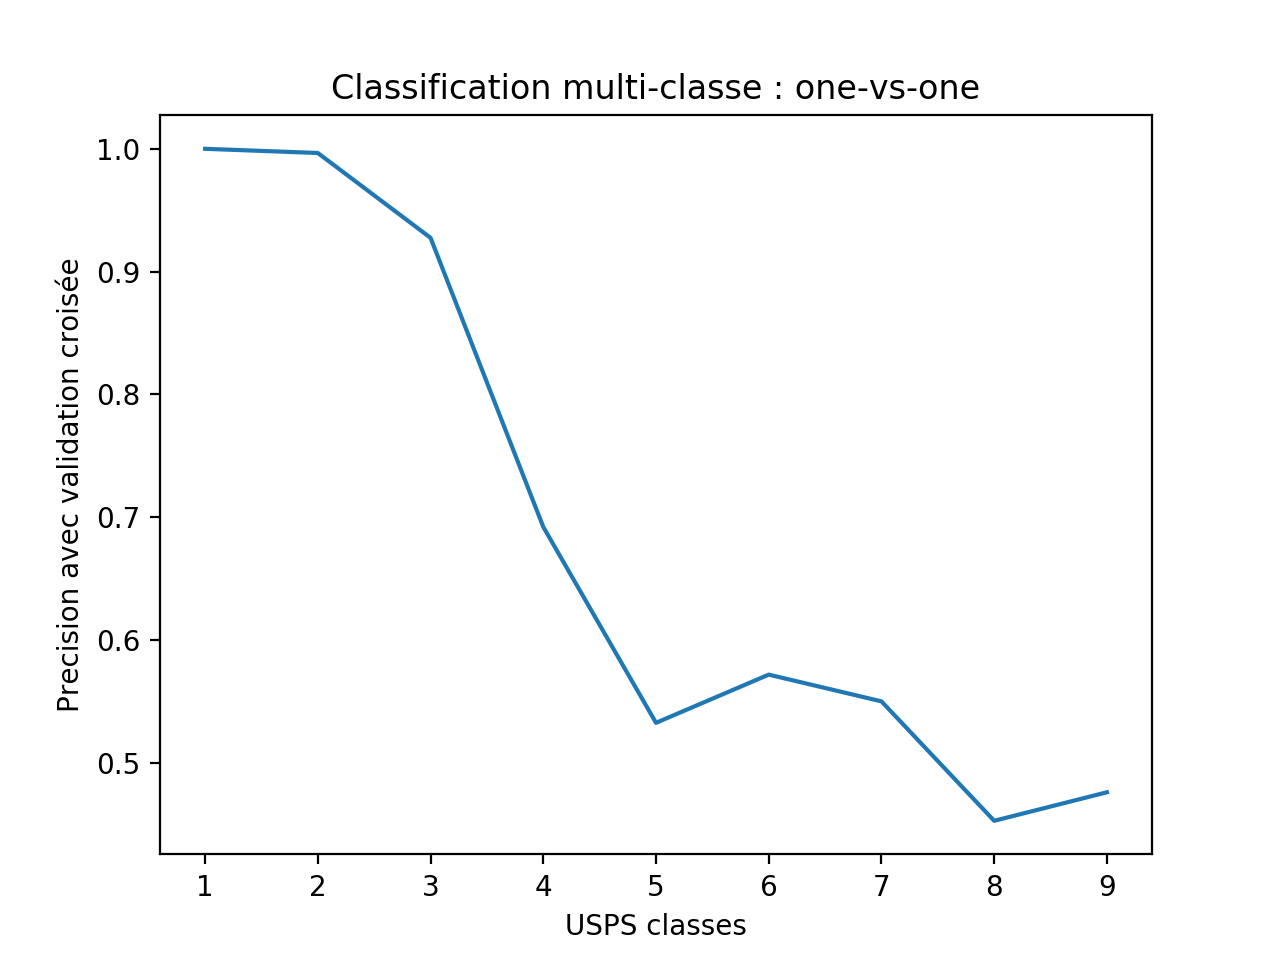

In [21]:
plt.figure()
plt.title("Classification multi-classe : one-vs-one")
plt.ylabel("Precision avec validation croisée")
plt.xlabel("USPS classes")
plt.plot(range(1,10), scores)
plt.savefig('../compte_rendu/TME1_6/images/tme5/multi_classe.png')

In [15]:
validation_croisee?

In [9]:
ind

(array([   7,    8,    9, ..., 7285, 7289, 7290]),)

In [126]:
def test(result):
    res = np.zeros(10)
    results_pos = np.zeros(10)
    for i in range(10):
        for j in range(10):
            r = result[i,j]
            if r == -1:
                res[i] += 0
            if r == 1:
                res[j] += 1
    return res
    #if(results_pos.max() > results_neg.max()):
    #    return(results_pos.argmax())
    #else:
    #    return(results_neg.argmax())

In [50]:
prediction = np.zeros(res.shape[0])
for i in range(res.shape[0]):
    #prediction[i] = res[i].sum(axis=1).argmax()
    prediction[i] = test(res[i])
np.count_nonzero(prediction == testy) / len(testy)

0.08819133034379671